# <p style="text-align: center;">Compte rendu du TP "focométrie"</p>


But du TP : Déterminer la distance focale de la lentille convergente.


_NB : 
Le résultat annoncé à la fin de chaque expérience n'est pas mis à jour automatiquement. Si le script est réutilisé avec de nouvelles données, il faut donc penser à actualiser manuellement les résultats._

In [1]:
# Imports des bibliothèques utiles :
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# Paramétrage des graphes (mise en gras des graduations des axes) :
font = {'family' : 'sans','weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

## Détermination de la focale à l'aide de la relation de conjugaison

### Protocole :

On place l'écran à une distance d'environ deux mètres de l'objet.

On positionne la lentille de sorte à former une image nette sur l'écran. 

On mesure la distance $d_1$ entre l'objet et la monture de la lentille puis la distance $d_2$ entre la monture de la lentille et l'écran :

<img src="schema_expe_1.jpg" alt="Schéma de l'expérience 1" width="400"/>

La mesure se fait au mètre ruban, précis au millimètre.

Les distances sont déterminées avec une précision estimée à quelques millimètres. Essentiellement à cause de l'indétermination de la position exacte du centre optique de la lentille qui est épaisse de près d'un centimètre et ne se situe probablement pas au niveau de la monture.

### Résultats de mesure :

In [2]:
# Distance objet-lentille :
d1 = 13.0e-2 # m
u_d1 = 0.5e-2 # m

# Distance lentille-écran :
d2 = 177e-2 # m
u_d2 = 0.5e-2 # m

### Analyse des données :

#### Calcul de la distance focale :

La relation de conjugaison s'écrit : 
$$ \dfrac{1}{\overline{OA'}} - \dfrac{1}{\overline{OA}} = \dfrac{1}{f'} \quad \text{ avec } \quad \overline{OA'} = d_2  \quad \text{ et } \quad \overline{OA} = -d_1 $$

Attention aux signes des distances algébriques !

On en déduit : $f'=\dfrac{d_1d_2}{d_1+d_2}$

In [3]:
f1 = d1*d2/(d1+d2)
print("f' = ",f1," m")

f' =  0.12110526315789474  m


#### Propagation des incertitudes :

On repart de la relation de conjugaison et on travaille avec les inverses des longueurs : 
$$ a_1 + a_2 = V \quad \text{ avec } \quad a_1 = \dfrac{1}{d_1} \quad ; \quad a_2 = \dfrac{1}{d_2} \quad \text{ et } \quad V = \dfrac{1}{f'} $$
On sait calculer l'incertitude de $a_i$ à partir de celle de $d_i$ (fonction d'une seule variable) : $u(a_i) = \dfrac{u(d_i)}{d_i^2}$ ou, autrement dit, $\dfrac{u(a_i)}{a_i} = \dfrac{u(d_i)}{d_i}$.

Et on connait l'incertitude d'une somme en fonction de celles de ses termes : $u(V) = \sqrt{u(a_1)^2+u(a_2)^2}$.

Enfin, on peut exprimer l'incertitude de $f'$ à partir de celle de $V$ : $u(f') = \dfrac{u(V)}{V^2}$

In [4]:
# Calcul des a_i et u(a_i) :
a1 = 1./d1
u_a1 = u_d1/d1**2
a2 = 1./d2
u_a2 = u_d2/d2**2

# Calcul de V et u(V) :
V = a1 + a2
u_V = np.sqrt( u_a1**2 + u_a2**2 )

# Calcul de u(f') :
u_f1 = u_V/V**2
print("u(f') = ",u_f1," m")

u(f') =  0.004339259808914373  m


On retiendra donc : $$f' = \text{12,1} \pm \text{0,4 } cm$$

## Détermination de la focale à l'aide de la méthode de Bessel

### Protocole : 

On place l'écran à une distance $D>4f'$ de l'objet de sorte qu'il existe deux positions de la lentille donnant des images nettes sur l'écran :

<img src="schema_expe_2.jpg" alt="Schéma de l'expérience 2" width="400"/>

On mesure la distance $D$ entre l'objet et l'écran. Cette mesure est ici relativement précise car ces objets sont facilement repérables. On considère qu'on est donc précis au millimètre près.

On positionne la lentille pour former l'image agrandie de l'objet (lentille plus proche de l'objet que de l'écran). On mesure alors la $d_-$ distance entre l'objet et <b>la monture</b> de la lentille. 

On déplace la lentille pour former l'image rétrécie de l'objet (lentille plus proche de l'écran que de l'objet). On mesure alors la $d_+$ distance entre l'objet et <b>la monture</b> de la lentille. 

Ces deux dernières mesures sont également précises au millimètre près, en particulier parce qu'on mesure la position de la monture de la lentille et non pas du centre optique.

In [5]:
# Mesure de D : 
D = 85.4e-2 # m
u_D = 0.1e-2 # m

# Mesure de d_- :
d_moins = 13.7e-2 # m
u_d_moins = 0.1e-2 # m

# Mesure de d_+ :
d_plus = 70.0e-2 # m
u_d_plus = 0.1e-2 # m

### Analyse des données :

#### Calcul de la distance focale :

On montre que $d_+-d_- = \sqrt{D^2-4Df'}$ soit $(d_+-d_-)^2 = D^2-4Df'$. Donc :
$$ f' = \dfrac{D^2-(d_+-d_-)^2}{4D} $$

In [6]:
def focale(D,d_plus,d_moins):
    return (D**2-(d_plus-d_moins)**2)/(4*D)

f2 = focale(D,d_plus,d_moins)
print("f = ",f2," m")

f =  0.12071048009367683  m


#### Estimation de l'incertitude à l'aide d'une simulation Monte-Carlo :

moyenne des f = 0.12070538845245583
écart-type des f = 0.0005859295516377828


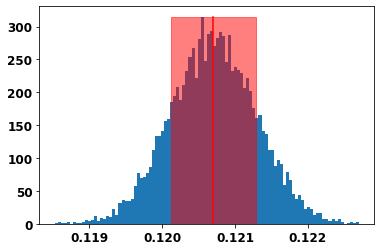

In [7]:
N = 10000

# On tire aléatoirement N valeurs de D, N valeurs de d_+ et N valeurs de d_- :
D_alea = np.random.normal(D,u_D,N)
d_plus_alea = np.random.normal(d_plus,u_d_plus,N)
d_moins_alea = np.random.normal(d_moins,u_d_moins,N)

# On calcule les focales correspondantes :
f_alea = focale(D_alea,d_plus_alea,d_moins_alea)

# On calcule les paramètres statistiques pertinents :
f_moy = f_alea.mean()
f_ect = f_alea.std()

print("moyenne des f =",f_moy)
print("écart-type des f =",f_ect)

# On visualise la distribution avec un histogramme :
figname = "histogramme des focales"
fig = plt.figure(figname)
N_bins = int(np.sqrt(N))
hist,bins,_ = plt.hist(f_alea, bins=N_bins)

# On ajoute les paramètres statistiques sur le graphe :
y_min = 0
y_max = max(hist)
plt.plot([f_moy,f_moy],[y_min,y_max],color = 'r')
xy=(f_moy-f_ect,0)
width = 2*f_ect
height = y_max-y_min
plt.gca().add_patch(patch.Rectangle(xy,width,height,color='r',alpha=0.5))

plt.show()

fig.savefig("histogramme.pdf", bbox_inches='tight')

L'incertitude-type sur $f'$ est l'écart-type de cette distribution :

In [8]:
u_f2 = f_ect

On retiendra donc : $$f' = \text{12,07} \pm \text{0,06 } cm$$

## Comparaison des deux résultats :

On calcule la différence $\Delta$ entre les deux résultats :

In [9]:
Delta = abs(f1-f2)
print("Delta = ",Delta," m")

Delta =  0.0003947830642179184  m


On calcule l'incertitude sur $\Delta$ :

In [10]:
u_Delta = np.sqrt(u_f1**2+u_f2**2)
print("u_Delta = ",u_Delta," m")

u_Delta =  0.004378640100389852  m


On considère que les résultats sont compatibles si $\Delta$ est plus petit que son incertitude élargie à 95 % (soit 2 fois son incertitude-type) : 

In [11]:
if (Delta<2*u_Delta) : print("Les résultats sont compatibles :)")
else : print("Les résultats ne sont pas compatibles :(")

Les résultats sont compatibles :)


## Conclusion :

Les deux mesures sont en accord sur la valeur de la foclae trouvée, ce qui est satisfaisant. 

On constate que la méthode de Bessel est plus précise que la méthode simple. Cela vient en particulier du fait qu'on n'a pas besoin de connaître précisément la position du centre optique par rapport à la monture de la lentille (un décalage du centre optique par rapport à la monture se simplifie dans la différence $d_+-d_-$).

## Pour aller plus loin :

On pourrait mesurer $d_+$ et $d_-$ pour plusieurs valeurs de $D$ ce qui permettrait sans doute d'accroître encore la précision sur le résultat de la focale.

On constate également que ces mesures qui s'appuient sur la formation d'une image sur un écran ne peuvent pas être mises en œuvre pour des lentilles divergentes. Il faudrait donc chercher une autre méthode pour la focométrie des lentilles divergentes.